<a href="https://colab.research.google.com/github/saicham/Study/blob/main/pycaret_automl_%ED%98%B8%EC%88%98%EA%B3%B5%EC%9B%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 2. Google Drive 연결
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [14]:
# 3. Google Drive에 있는 iris 데이터 로드
import pandas as pd
# data = pd.read_csv('/content/drive/My Drive/Automl_test/insurance.csvv')
data = pd.read_csv('/content/drive/My Drive/Automl_test/(학습용)호수공원Top10출발지대여소일일집계.csvv')

In [15]:
data

,st_spot,weeks,holiday,rain,wind,cloud,temp,gtemp,festv,cnt
0,10000057,5,0,0.0,4.3,9.0,9.844231,15.865385,1,52
1,10000057,6,1,0.0,2.9,6.0,10.226000,20.946000,1,50
2,10000057,0,1,0.0,3.5,6.0,11.847917,24.035417,1,48
3,10000057,1,0,0.0,3.4,7.0,11.485965,16.796491,1,57
4,10000057,2,0,0.0,2.8,10.0,9.840909,13.729545,1,44
...,...,...,...,...,...,...,...,...,...,...
1224,10000480,3,0,0.0,3.5,8.0,28.645205,34.917808,0,73
1225,10000480,4,0,3.0,2.8,8.0,28.721053,39.136842,0,38
1226,10000480,5,0,0.0,2.3,7.0,31.314063,37.132812,0,64
1227,10000480,6,1,0.0,4.1,10.0,29.211111,32.526667,1,45


In [5]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 63.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 61.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 71.9 MB/s eta 0:

In [17]:
from pycaret.regression import *
s = setup(data, target = 'cnt', session_id = 42)

,Description,Value
0,Session id,42
1,Target,cnt
2,Target type,Regression
3,Original data shape,"(1229, 10)"
4,Transformed data shape,"(1229, 10)"
5,Transformed train set shape,"(860, 10)"
6,Transformed test set shape,"(369, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


In [18]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,14.0247,335.2446,18.2620,0.7771,0.3634,0.4062,0.2730
xgboost,Extreme Gradient Boosting,14.1835,348.5779,18.6100,0.7678,0.3567,0.3577,0.3340
et,Extra Trees Regressor,14.4853,355.2526,18.7979,0.7630,0.3694,0.3921,0.4400
gbr,Gradient Boosting Regressor,14.4831,359.2849,18.8735,0.7628,0.3816,0.3871,0.3390
rf,Random Forest Regressor,14.3133,359.9427,18.8902,0.7619,0.3671,0.3923,0.8180
dt,Decision Tree Regressor,18.8802,724.3198,26.6874,0.5217,0.4331,0.4155,0.1000
ada,AdaBoost Regressor,23.3655,794.3851,28.1199,0.4747,0.5113,0.6691,0.2150
knn,K Neighbors Regressor,21.4163,792.7002,28.1042,0.4682,0.5212,0.6695,0.1140
llar,Lasso Least Angle Regression,27.9870,1263.3441,35.4174,0.1665,0.5669,0.7879,0.0510
lasso,Lasso Regression,27.9869,1263.4170,35.4184,0.1664,0.5670,0.7880,0.0510


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [20]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

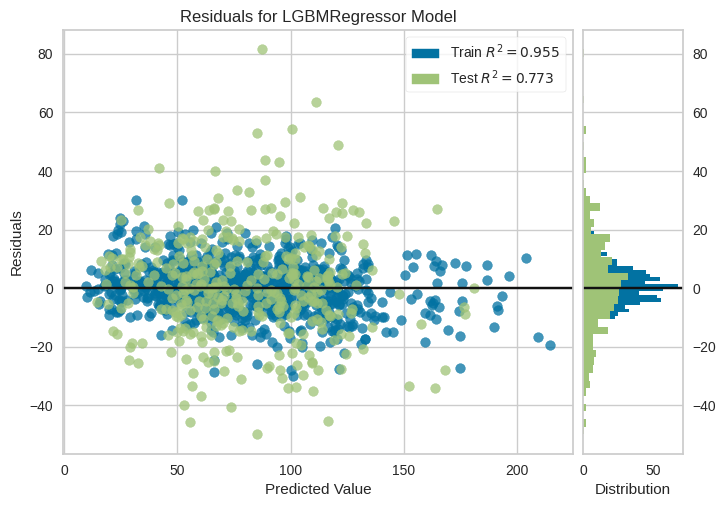

In [21]:
plot_model(best, plot = 'residuals')